In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos = pd.read_csv(r'C:\Users\PC\Desktop\proj_data\1-Youtube Text Data Analysis/UScomments.csv', error_bad_lines=False)
videos

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

In [3]:
!pip install textblob

In [4]:
from textblob import TextBlob

In [5]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [6]:
polarity=[]
for i in videos['comment_text']:
    try :
        polarity.append(TextBlob(i).sentiment.polarity)
    except :
        polarity.append(0)

In [7]:
videos['polarity']= polarity
videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [8]:
positive_comments = videos[videos['polarity']==1]
positive_comments.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [9]:
!pip install wordcloud

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
total_comments = (' '.join(positive_comments['comment_text']))
len(total_comments)

846560

(-0.5, 999.5, 499.5, -0.5)

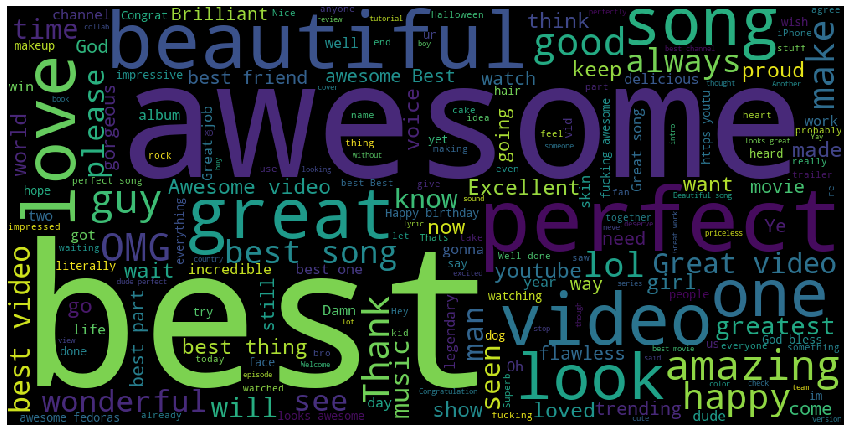

In [12]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords= set(STOPWORDS)).generate(total_comments)
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [13]:
negative_comments = videos[videos['polarity']==-1]
negative_comments.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [14]:
total_negative_comments = (' '.join(negative_comments['comment_text']))
len(total_negative_comments)

190787

(-0.5, 999.5, 499.5, -0.5)

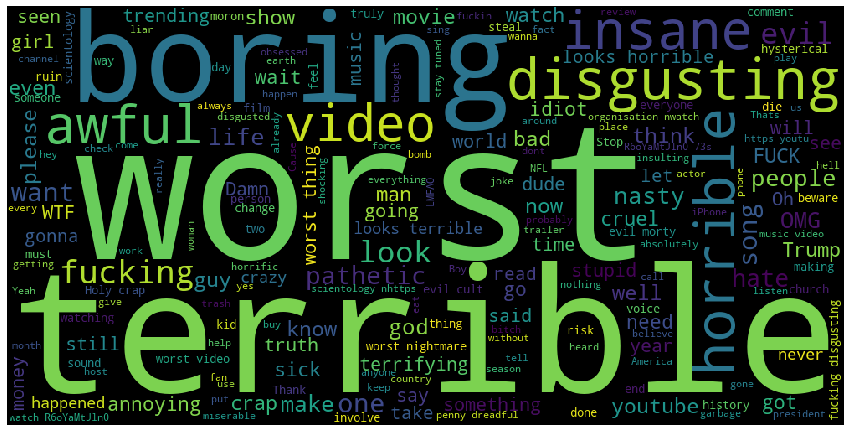

In [15]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords= set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis('off')

## Analysing Tags column,what are trending tags on youtube

In [16]:
videos2 =pd.read_csv(r'C:\Users\PC\Desktop\proj_data\1-Youtube Text Data Analysis/USvideos.csv', error_bad_lines= False)
videos2.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [17]:
tags_complete = (' '.join(videos2['tags']))

In [18]:
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [19]:
import re

In [20]:
tags =re.sub('[^a-z,A-Z]',' ',tags_complete)

In [21]:
tags =re.sub(' +',' ',tags)

(-0.5, 999.5, 499.5, -0.5)

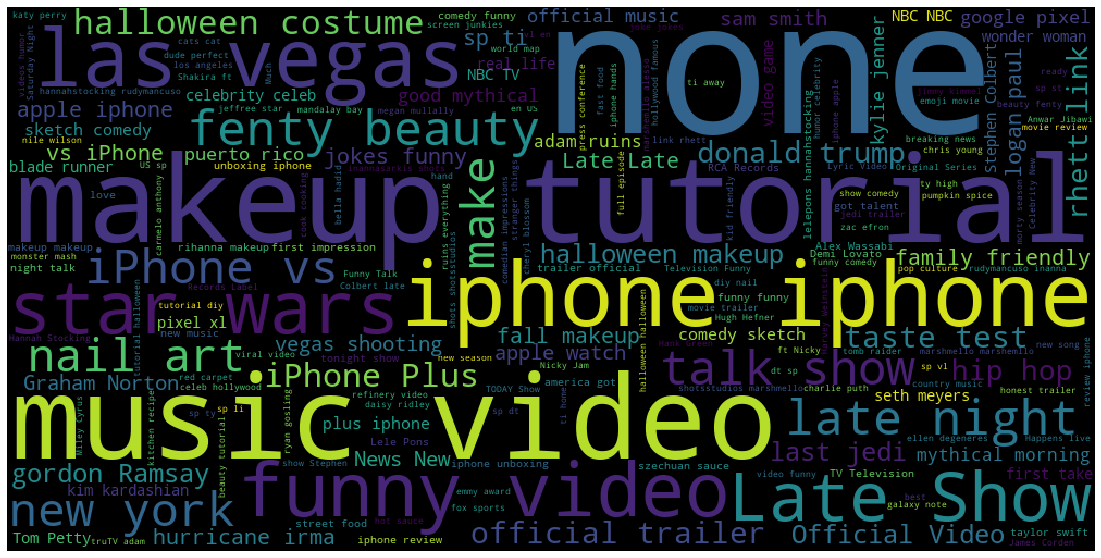

In [22]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords= set(STOPWORDS)).generate(tags)
plt.figure(figsize =(20,10))
plt.imshow(wordcloud)
plt.axis('off')

## Analysis on likes views and dislikes

Text(0.5, 1.0, 'relation between views and likes')

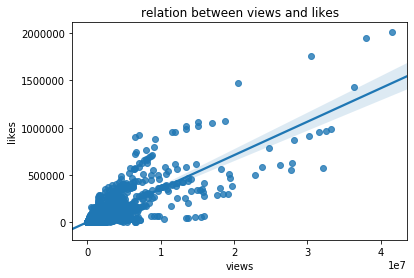

In [23]:
sns.regplot(videos2['views'], videos2['likes'])
plt.title("relation between views and likes")

Text(0.5, 1.0, 'relation between views and dislikes')

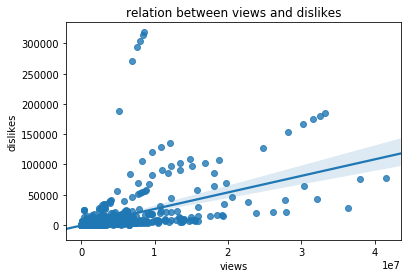

In [24]:
sns.regplot(videos2['views'],videos2['dislikes'])
plt.title("relation between views and dislikes")

(3.0, 0.0)

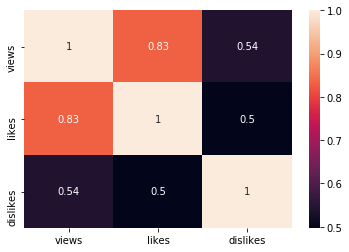

In [25]:
df_corr = videos2[['views','likes','dislikes']]
ax = sns.heatmap(df_corr.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## perform emoji analysis

In [26]:
videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [27]:
!pip install emoji

In [28]:
import emoji

In [29]:
videos['comment_text'].dropna(inplace =True)

In [30]:
len(videos['comment_text'])

691375

In [31]:
videos['comment_text'][4]

'trending 😉'

In [32]:
'\U0001F600'

'😀'

In [33]:
str = ''
for i in videos['comment_text'] :
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list :
        str = str+ ele

In [34]:
print(str)

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊🌀

In [35]:
len(str)

304745

In [36]:
len(set(str))

1123

In [37]:
res ={i: str.count(i) for i in set(str)}
res

{'✏': 13,
 '💌': 71,
 '🧀': 28,
 '🥁': 23,
 '🤪': 1,
 '🥊': 15,
 '📀': 68,
 '💵': 628,
 '😞': 364,
 '🐰': 38,
 '🍳': 28,
 '📐': 9,
 '☺': 1180,
 '😭': 8398,
 '😂': 36987,
 '👤': 8,
 '🚉': 4,
 '😷': 139,
 '➖': 11,
 '🍥': 22,
 '🔌': 14,
 '🔛': 17,
 '😜': 573,
 '💊': 14,
 '🏊': 16,
 '🔎': 6,
 '📝': 19,
 '🗼': 15,
 '🎓': 17,
 '🐑': 117,
 '🎶': 906,
 '📹': 24,
 '🍗': 327,
 '🃏': 16,
 '🏽': 1593,
 '🤠': 60,
 '🐗': 9,
 '👪': 14,
 '🐣': 71,
 '🐙': 31,
 '🌡': 7,
 '✳': 14,
 '💬': 13,
 '💕': 5147,
 '🐼': 52,
 '🌄': 8,
 '🗨': 6,
 '♣': 12,
 '☮': 17,
 '🥒': 8,
 '🏟': 8,
 '👕': 24,
 '🕙': 4,
 '🎎': 3,
 '🔜': 18,
 '🏁': 18,
 '⚽': 76,
 '💅': 127,
 '🐩': 40,
 '↖': 4,
 '🎰': 6,
 '🚚': 4,
 '🔳': 3,
 '📖': 26,
 '😀': 1734,
 '🕥': 5,
 '🚈': 5,
 '🌋': 42,
 '🛰': 6,
 '💉': 14,
 '🉑': 4,
 '💸': 235,
 '🤕': 32,
 '🏐': 33,
 '🛎': 12,
 '🚢': 11,
 '😱': 2094,
 '📰': 9,
 '⛷': 5,
 '🇨': 878,
 '💣': 197,
 '🕢': 5,
 '🐿': 8,
 '🖥': 12,
 '🦑': 11,
 '🚏': 3,
 '😈': 393,
 '📨': 9,
 '🦐': 7,
 '👀': 495,
 '🔓': 9,
 '🏪': 5,
 '🌇': 8,
 '🌠': 41,
 '⚓': 16,
 '😿': 126,
 '😕': 453,
 '🌚': 66,
 '🔝': 143,
 '🏇': 5,
 

In [38]:
res ={k:v for k,v in sorted(res.items(),key = lambda item : item[1])}
res

{'🤪': 1,
 '🧢': 1,
 '🤬': 1,
 '🤭': 1,
 '♾': 1,
 '🤟': 1,
 '⏹': 2,
 '⚗': 2,
 '🤨': 2,
 '☣': 2,
 '🖲': 2,
 '⏺': 2,
 '🛢': 2,
 '🎏': 2,
 '☦': 2,
 '🔟': 2,
 '⚒': 2,
 '🏷': 2,
 '🖨': 2,
 '⏭': 2,
 '⚙': 2,
 '⏸': 2,
 '⏯': 2,
 '🗄': 2,
 '🎎': 3,
 '🔳': 3,
 '🚏': 3,
 '🔖': 3,
 '🕳': 3,
 '◻': 3,
 '🛩': 3,
 '🛣': 3,
 '⛰': 3,
 '🏎': 3,
 '🗒': 3,
 '🕉': 3,
 '◽': 3,
 '📴': 3,
 '🖇': 3,
 '🏑': 3,
 '◼': 3,
 '🗃': 3,
 '⏮': 3,
 '💹': 3,
 '🤺': 3,
 '🕹': 3,
 '🛶': 3,
 '🗜': 3,
 '➗': 3,
 '⚛': 3,
 '🗓': 3,
 '🗳': 3,
 '🗂': 3,
 '🏮': 3,
 '🖌': 3,
 '🧐': 3,
 '⏲': 3,
 '☸': 3,
 '☂': 3,
 '🚕': 3,
 '🗞': 3,
 '🚉': 4,
 '🕙': 4,
 '↖': 4,
 '🚚': 4,
 '🉑': 4,
 '◾': 4,
 '🕒': 4,
 '🌫': 4,
 '🏚': 4,
 '🖊': 4,
 '🈸': 4,
 '➿': 4,
 '🌥': 4,
 '🛂': 4,
 'Ⓜ': 4,
 '🆚': 4,
 '🚜': 4,
 '🈚': 4,
 '🚎': 4,
 '🔃': 4,
 '🥜': 4,
 '🚃': 4,
 '🆔': 4,
 '🈂': 4,
 '🕠': 4,
 '🏖': 4,
 '↕': 4,
 '🚖': 4,
 '🕍': 4,
 '🕟': 4,
 '🕜': 4,
 '🛃': 4,
 '🕘': 4,
 '🏤': 4,
 '🔹': 4,
 '🏔': 4,
 '🚟': 4,
 '☪': 4,
 '🕡': 4,
 '🕔': 4,
 '🈺': 4,
 '🕣': 4,
 '🛵': 4,
 '⛏': 4,
 '🥅': 4,
 '🖼': 4,
 '🔲': 4,
 '🏛': 4,
 '🎚': 4,
 '🎐': 4,
 

In [39]:
keys = [*res.keys()]
values = [*res.values()]

In [40]:
keys[0]

'🤪'

In [41]:
df = pd.DataFrame({'chars': keys[-20:], 'num':values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

In [42]:
!pip install plotly

In [43]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [44]:
trace = go.Bar(x = df['chars'], y= df['num'])

In [45]:
iplot([trace])